In [1]:
from fastbook import *

/mnt/bigdrive1/cnn/anaconda3/envs/fastai/lib/python3.8/site-packages/torch/cuda/__init__.py:125: UserWarning: 
GeForce RTX 2080 with CUDA capability sm_75 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_61 sm_70 compute_37.
If you want to use the GeForce RTX 2080 GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


In [2]:
from fastai.vision.all import *

In [5]:
path = untar_data(URLs.PETS)

In [6]:
path.ls()

(#3) [Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/models'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/annotations')]

In [7]:
path_images = path/'images'

In [9]:
path_images.ls()

(#7394) [Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/english_setter_58.jpg'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/newfoundland_77.jpg'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/american_bulldog_168.jpg'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/Bengal_76.jpg'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/Abyssinian_196.jpg'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/Bengal_123.jpg'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/leonberger_179.jpg'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_116.jpg'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/pug_33.jpg'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/scottish_terrier_155.jpg')...]

In [11]:
doc(ImageDataLoaders.from_name_func)

In [12]:
doc(get_image_files)

In [13]:
def is_cat(x): return x[0].isupper()

In [14]:
fnames = get_image_files(path_images)

In [15]:
dls = ImageDataLoaders.from_name_func(path_images, fnames, label_func=is_cat, valid_pct=0.2, seed=42, item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())

In [16]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)

In [17]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.189312,0.039335,0.988498,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.075372,0.047046,0.989175,00:17
1,0.056724,0.024012,0.993234,00:17


In [18]:
interp = ClassificationInterpretation.from_learner(learn)

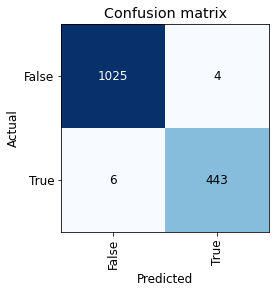

In [19]:
interp.plot_confusion_matrix()

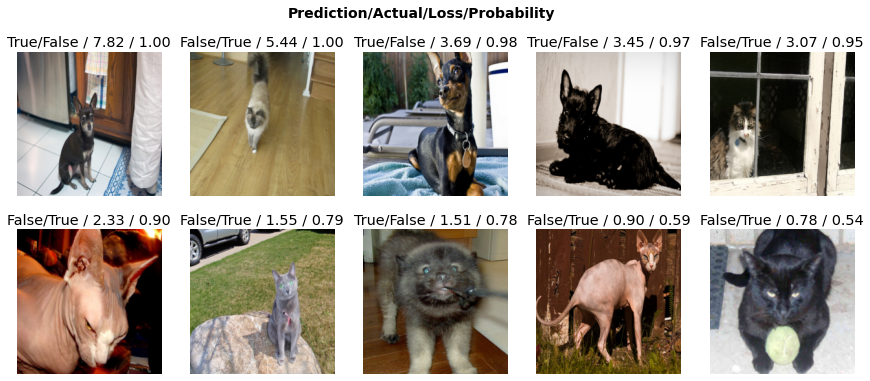

In [21]:
interp.plot_top_losses(10, nrows=2)

The model is making 10 mistakes in terms of classifying cats and dogs.

In [22]:
doc(learn.export)

In [23]:
learn.export(fname='cat_or_dog_resnet18_export1.pkl')

In [24]:
doc(learn.fine_tune)

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=9.12010818865383e-07)

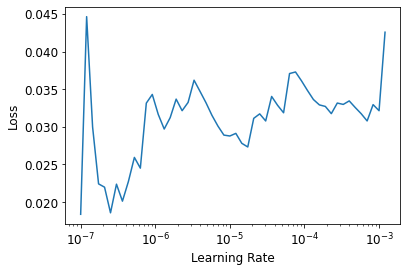

In [25]:
learn.lr_find()

In [26]:
learn.fit_one_cycle(2, lr_max=slice(6.309573450380412e-08, 9.12010818865383e-07))

epoch,train_loss,valid_loss,accuracy,time
0,0.039924,0.024720,0.993911,00:17
1,0.035143,0.024244,0.993911,00:17


That did not help improve accuracy. :-( Lets try the larger resnet to see what we get and if we get better.

In [27]:
learn2 = cnn_learner(dls, resnet34, metrics=error_rate)

In [28]:
learn2.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.183923,0.016936,0.005413,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.065274,0.037392,0.008119,00:27
1,0.057676,0.015614,0.007442,00:28
2,0.031343,0.003899,0.000677,00:28
3,0.021810,0.002954,0.000000,00:28


0% error? Wow! :-)

In [29]:
interp2 = ClassificationInterpretation.from_learner(learn2)

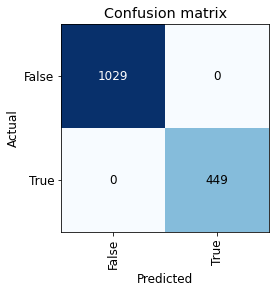

In [30]:
interp2.plot_confusion_matrix()

Perfect confusion matrix!

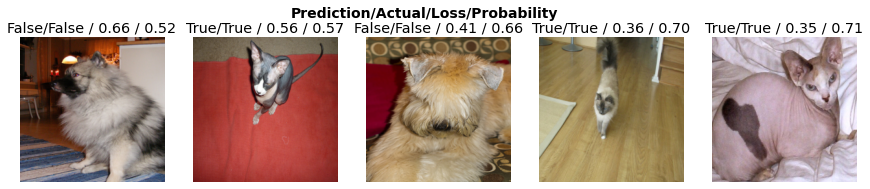

In [32]:
interp2.plot_top_losses(5, nrows=1)

In [33]:
learn2.export(fname="cat_or_dog_resnet34_export.pkl")